In [12]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import json
import os

# Test 1 

- [X] ijk rank:

Fortran F[i,j,k], in Python would be F[k,j,i]

- [X] 2D works in a 3D way


In [17]:
f=h5py.File('output.h5','r')

In [18]:
print(f.keys())
print(f['phi'].keys())
print(f['phi']['test'])

<KeysViewHDF5 ['phi']>
<KeysViewHDF5 ['test']>
<HDF5 dataset "test": shape (2, 8, 4), type "<f8">


[0. 1. 2. 3.]


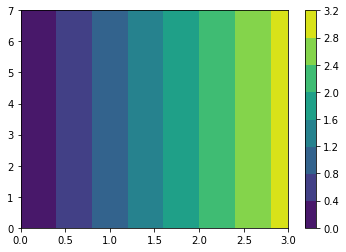

In [19]:
array = np.array(f['phi']['test'])
print(np.unique(array))
plt.contourf(array[0,:,:])
plt.colorbar()

# Test 2

- [X] python create attributes and field value


- [X] For next part, see if Fortran can read the H5 correctly

In [65]:
f2=h5py.File('input.h5','w')

Load the parameters from the ``input.json`` file and assign to the hdf5 attributes

In [66]:
f2.create_group('phi')
grp = f2['phi']
grp.create_dataset("test", data=array)
print(f2['phi']['test'])

<HDF5 dataset "test": shape (2, 8, 4), type "<f8">


In [67]:
f2.close()

In [68]:
f22=h5py.File('input.h5','r')

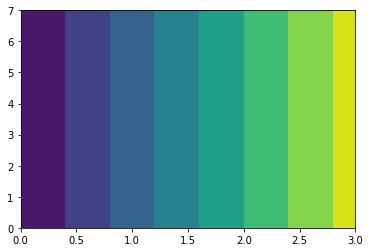

In [69]:
plt.contourf(f22['phi']['test'][0,:,:])
f22.close()

# Test 3

- [X] Full Initialization


- [X] Read and weite with specific variables

In [70]:
f3=h5py.File('input.h5','w')

In [71]:
def create_group(h5file,name,fdata):
    grp = h5file.create_group(name)
    grp.create_dataset("init",data=fdata)

In [72]:
create_group(f3,'phi',array)
create_group(f3,'u',array+1.0)
create_group(f3,'v',array+3.0)

In [73]:
f3.close()

In [74]:
f33=h5py.File('input.h5','r')

In [75]:
print(f33.keys())
print(f33['phi'].keys())
print(f33['u'].keys())
print(f33['v'].keys())
print(f33['phi']['init'])
print(f33['u']['init'])
print(f33['v']['init'])

<KeysViewHDF5 ['phi', 'u', 'v']>
<KeysViewHDF5 ['init']>
<KeysViewHDF5 ['init']>
<KeysViewHDF5 ['init']>
<HDF5 dataset "init": shape (2, 8, 4), type "<f8">
<HDF5 dataset "init": shape (2, 8, 4), type "<f8">
<HDF5 dataset "init": shape (2, 8, 4), type "<f8">


In [76]:
f33.close()